In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
std = 20

In [3]:
A = np.random.normal(200, std, size=(200, 12)) # A grubuna ait 200 ürünün 12 aylık satışı ~ N(200, std)
B = np.random.normal(175, std, size=(150, 12)) # B grubuna ait 150 ürünün 12 aylık satışı ~ N(175, std)
C = np.random.normal(150, std, size=(250, 12)) # C grubuna ait 250 ürünün 12 aylık satışı ~ N(150, std)
print('A: %d items sold in %d months' % A.shape)
print('B: %d items sold in %d months' % B.shape)
print('C: %d items sold in %d months' % C.shape)

A: 200 items sold in 12 months
B: 150 items sold in 12 months
C: 250 items sold in 12 months


In [4]:
sales = np.concatenate([A, B, C], axis=0) # ürün gruplarını (A, B, C), sales değişkeninde birleştiriyoruz.
sales.shape

(600, 12)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Sales')

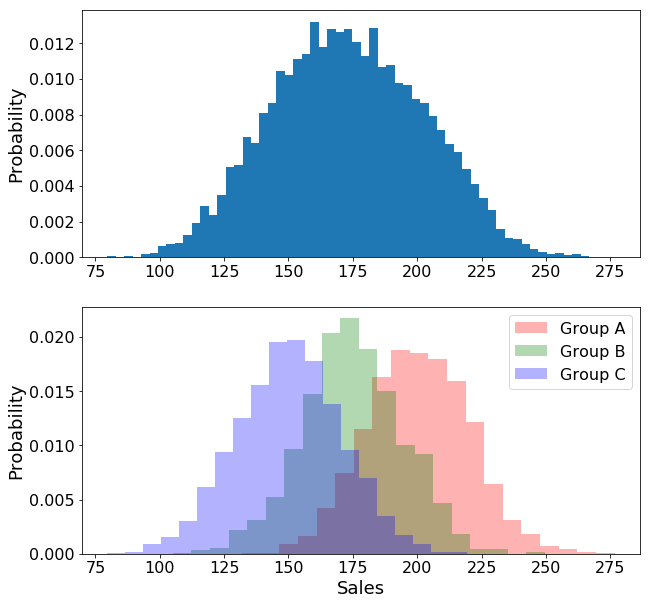

In [5]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10)) # 2 satır 1 sütünluk şema oluşturduk.
axes[0].hist(sales.reshape(-1),  bins=60, normed=True) # bütün satışların 60 sütunluk histogramı 
axes[1].hist(A.reshape(-1), color='r', alpha=0.3, bins=20, label='Group A', normed=True) # A grubu satışlarının 20 sütunluk histogramı
axes[1].hist(B.reshape(-1), color='g', alpha=0.3, bins=20, label='Group B', normed=True) # B grubu satışlarının 20 sütunluk histogramı
axes[1].hist(C.reshape(-1), color='b', alpha=0.3, bins=20, label='Group C', normed=True) # C grubu satışlarının 20 sütunluk histogramı
axes[1].legend(fontsize=16) # İkinci şemaya açıklama ekliyoruz. Fontsize önemli.
[ax.tick_params(labelsize=16) for ax in axes] # Şemaların sayı boyutlarını artırdık.
axes[0].set_ylabel('Probability', fontsize=18)
axes[1].set_ylabel('Probability', fontsize=18)
axes[1].set_xlabel('Sales', fontsize=18)

In [6]:
from sklearn.cluster import KMeans # KMeans kümeleme algoritması
from sklearn.decomposition import PCA # PCA boyut küçültme algoritması

In [7]:
kmeans = KMeans(n_clusters=3).fit(sales) # 12 aylık satış rakamlarını üç kümede sınıflandırdık. 
labels = kmeans.labels_ # Her ürünün hangi kümeye ait olduğunu çektik. 
centers = kmeans.cluster_centers_ # 12 boyutlu (aylar) üç küme merkezinin konumunu aldık.
print(sales.shape, labels.shape, centers.shape)

(600, 12) (600,) (3, 12)


In [8]:
pca = PCA(n_components=2).fit(sales) # 12 aylık satış rakamlarını iki boyuta indirgedik.
kmeans_transform = pca.transform(sales) # İndirgenmiş boyuttaki verileri aldık.
centers_transform = pca.transform(centers) # Küme merkezlerini de iki boyuta indirgedik.
print(kmeans_transform.shape, centers_transform.shape)

(600, 2) (3, 2)


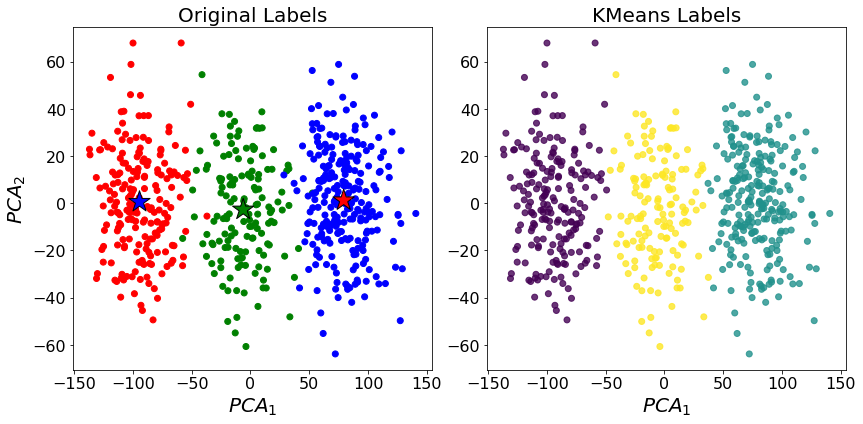

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6)) # Tek satır, iki sütunluk şemayı oluşturduk.
c = ['r' for i in range(len(A))] + ['g' for i in range(len(B))] + ['b' for i in range(len(C))] # Verilerin gerçek sınıfları
axes[1].scatter(kmeans_transform[:, 0], kmeans_transform[:, 1], c=labels, alpha=0.8) # İlk plotta indirgenmiş verileri gerçek sınıflarına göre görselleştirdik. 
axes[0].scatter(kmeans_transform[:, 0], kmeans_transform[:, 1], c=c) # İkinci plotta indirgenmiş verileri kümeleme algoritmasının sonucuna göre görselleştirdik.
axes[0].scatter(centers_transform[:, 0], centers_transform[:, 1], c=['b', 'r', 'g'],
                marker='*', edgecolor='black', s=500) # İndirgenmiş boyuttaki küme merkezlerini yıldız şeklinde görselleştirdik.
axes[0].set_ylabel('$PCA_2$', fontsize=20)
axes[0].set_title('Original Labels', fontsize=20)
axes[1].set_title('KMeans Labels', fontsize=20)
[ax.set_xlabel('$PCA_1$', fontsize=20) for ax in axes]
[ax.tick_params(labelsize=16) for ax in axes]
fig.tight_layout()

Ürün gruplarının gelir modelleri: 
$${Gelir}_A = 2.5 * {Satış}_A + N(0, 15)$$ 
$${Gelir}_B = 2 * {Satış}_B+ N(0, 15)$$
$${Gelir}_C = 1.5 * {Satış}_C + N(0, 15)$$

In [10]:
profit_A = 2.5 * (A + np.random.normal(0, 15, size=A.shape))
profit_B = 2 * (B + np.random.normal(0, 15, size=B.shape))
profit_C = 1.5 * (C + np.random.normal(0, 15, size=C.shape))
profits = np.concatenate([profit_A, profit_B, profit_C], axis=0)
profits.shape

(600, 12)

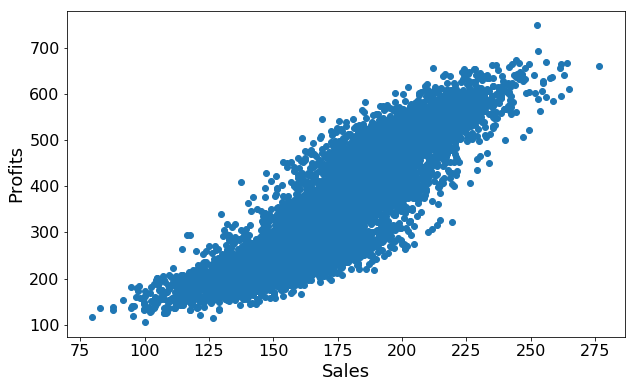

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(sales, profits)
ax.set_ylabel('Profits', fontsize=18)
ax.set_xlabel('Sales', fontsize=18)
ax.tick_params(labelsize=16)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
# Her ayın satışına karşın gelen geliri modellemek istediğimiz için; (600,12) boyutundaki 
# gelir ve satış verimizi (7200, 1) boyutuna getirdik.
reg = LinearRegression().fit(sales.reshape(-1, 1), profits.reshape(-1, 1))

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [14]:
# Tahminimizin R2 değerini hesapladık. 
R2 = reg.score(sales.reshape(-1, 1), profits.reshape(-1, 1))
print('R^2= %.2f' % R2)

R^2= 0.77


In [15]:
print('Model: PROFITS = %.2f x SALES %.2f' % (reg.coef_[0], reg.intercept_)) # Çıkan modelimiz

Model: PROFITS = 3.87 x SALES -320.58


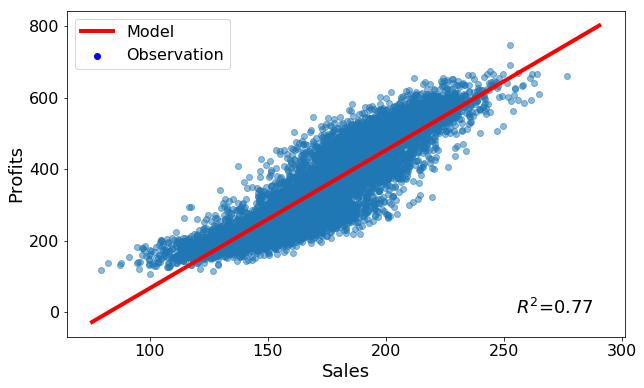

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(sales, profits, alpha=0.5)
ax.scatter([], [], c='b', label='Observation')
x_vals = np.array([0.95 * sales.min(), 1.05 * sales.max()])
ax.plot(x_vals, reg.coef_[0]*x_vals + reg.intercept_, c='r', linewidth=4, label='Model')
ax.legend(fontsize=16)
ax.text(255, -5, '$R^2$=%.2f' % reg.score(sales.reshape(-1, 1), profits.reshape(-1, 1)), fontsize=18)
ax.set_ylabel('Profits', fontsize=18)
ax.set_xlabel('Sales', fontsize=18)
ax.tick_params(labelsize=16)

In [17]:
print(np.where(labels == 0), 'Group C') # Kümeleme algoritmamızın 0. Küme olarak döndüğü C grubu ürünler

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

In [18]:
print(np.where(labels == 1), 'Group A') # Kümeleme algoritmamızın 1. Küme olarak döndüğü A grubu ürünler

(array([273, 289, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360,
       361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373,
       374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386,
       387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399,
       400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412,
       413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425,
       426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438,
       439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451,
       452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464,
       465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477,
       478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490,
       491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503,
       504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516,
       517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 5

In [19]:
print(np.where(labels == 2), 'Group B') # Kümeleme algoritmamızın 2. Küme olarak döndüğü B grubu ürünler

(array([197, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,
       212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,
       225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 238,
       239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
       252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,
       265, 267, 268, 269, 270, 271, 272, 274, 275, 276, 277, 278, 279,
       280, 281, 282, 283, 284, 285, 286, 287, 288, 290, 291, 292, 293,
       294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306,
       307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319,
       320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332,
       333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345,
       346, 347, 348, 349, 590]),) Group B


In [20]:
C_indexes, = np.where(labels == 0)
A_indexes, = np.where(labels == 1)
B_indexes, = np.where(labels == 2)

In [21]:
# Satış ve gelir verimizi gruplara böldük.
sales_A, profits_A = sales[A_indexes, :], profits[A_indexes, :]
sales_B, profits_B = sales[B_indexes, :], profits[B_indexes, :]
sales_C, profits_C = sales[C_indexes, :], profits[C_indexes, :]
sales_A.shape, sales_B.shape, sales_C.shape, profits_A.shape, profits_B.shape, profits_C.shape

((251, 12), (148, 12), (201, 12), (251, 12), (148, 12), (201, 12))

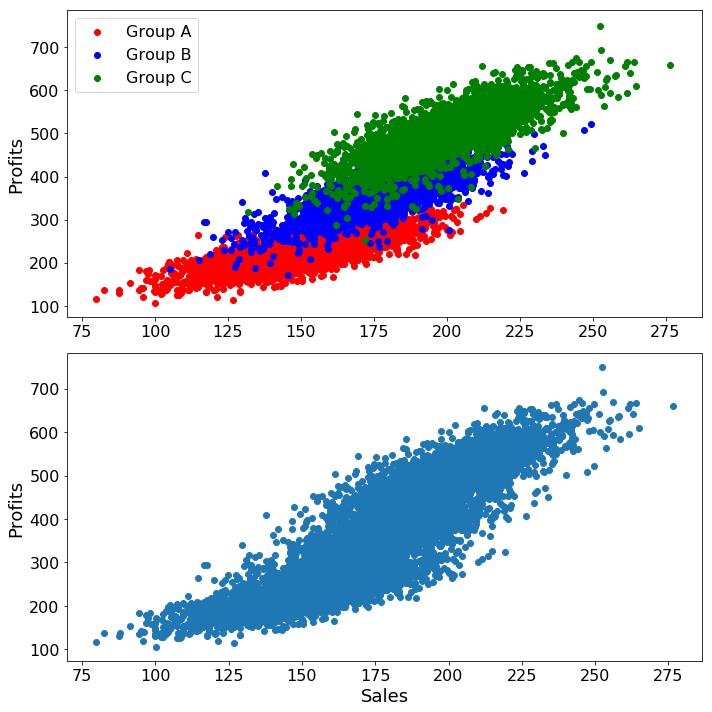

In [22]:
fig, [ax, bx] = plt.subplots(2, 1, figsize=(10, 10))
ax.scatter(sales_A, profits_A, color='r', label='Group A')
ax.scatter(sales_B, profits_B, color='b', label='Group B')
ax.scatter(sales_C, profits_C, color='g', label='Group C')
bx.scatter(sales, profits)
ax.legend(fontsize=16)
ax.set_ylabel('Profits', fontsize=18)
bx.set_ylabel('Profits', fontsize=18)
bx.set_xlabel('Sales', fontsize=18)
ax.tick_params(labelsize=16)
bx.tick_params(labelsize=16)
fig.tight_layout()

In [23]:
# Her grup için ayrı model eğittik.
reg_A = LinearRegression().fit(sales_A.reshape(-1, 1), profits_A.reshape(-1, 1))
reg_B = LinearRegression().fit(sales_B.reshape(-1, 1), profits_B.reshape(-1, 1))
reg_C = LinearRegression().fit(sales_C.reshape(-1, 1), profits_C.reshape(-1, 1))

In [24]:
reg_A.coef_, reg_B.coef_, reg_C.coef_

(array([[ 1.46892625]]), array([[ 2.05445066]]), array([[ 2.51179403]]))

In [25]:
reg_A.intercept_, reg_B.intercept_, reg_C.intercept_

(array([ 5.22170534]), array([-8.89480524]), array([-1.79610974]))

In [26]:
# Modellerimizin R2 değerleri (ilk duruma göre küçük)
R2_A = reg_A.score(sales_A.reshape(-1, 1), profits_A.reshape(-1, 1))
R2_B = reg_B.score(sales_B.reshape(-1, 1), profits_B.reshape(-1, 1))
R2_C = reg_C.score(sales_C.reshape(-1, 1), profits_C.reshape(-1, 1))
print('A: R^2= %.2f' % R2_A)
print('B: R^2= %.2f' % R2_B)
print('C: R^2= %.2f' % R2_C)

A: R^2= 0.60
B: R^2= 0.61
C: R^2= 0.61


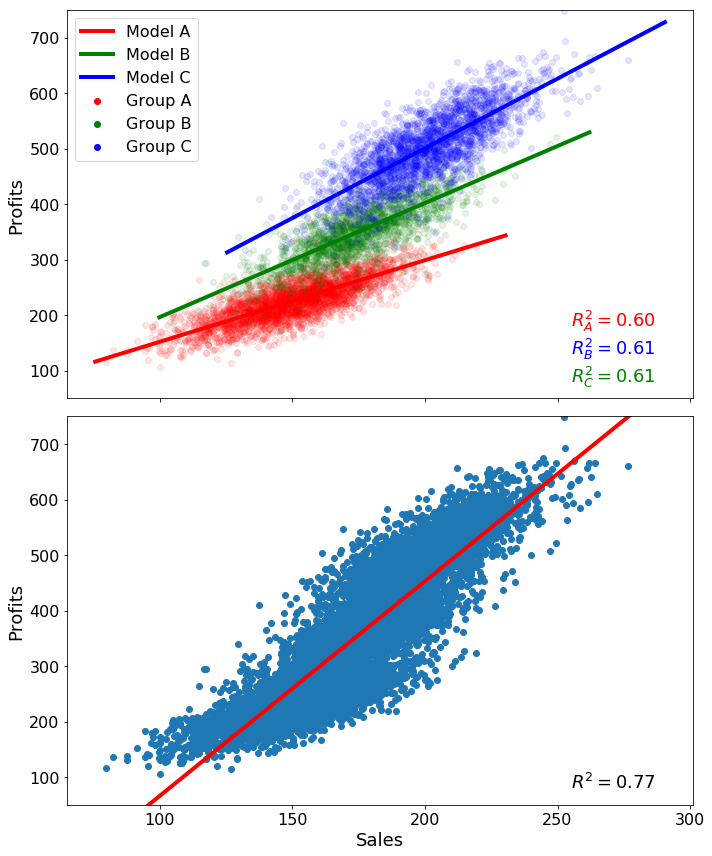

In [27]:
fig, [ax, bx] = plt.subplots(2, 1, figsize=(10, 12), sharex=True, sharey=True)
ax.scatter(sales_A, profits_A, alpha=0.1, c='r')
ax.scatter([], [], c='r', label='Group A') # Noktalara açıklama ekleyebilmek için yapılan bir çakallık
x_vals_A = np.array([0.95 * sales_A.min(), 1.05 * sales_A.max()])

ax.scatter(sales_B, profits_B, alpha=0.1, c='g')
ax.scatter([], [], c='g', label='Group B') 
x_vals_B = np.array([0.95 * sales_B.min(), 1.05 * sales_B.max()])

ax.scatter(sales_C, profits_C, alpha=0.1, c='b')
ax.scatter([], [], c='b', label='Group C')
x_vals_C = np.array([0.95 * sales_C.min(), 1.05 * sales_C.max()])

ax.plot(x_vals_A, reg_A.coef_[0]*x_vals_A + reg_A.intercept_, c='r', linewidth=4, label='Model A')
ax.plot(x_vals_B, reg_B.coef_[0]*x_vals_B + reg_B.intercept_, c='g', linewidth=4, label='Model B')
ax.plot(x_vals_C, reg_C.coef_[0]*x_vals_C + reg_C.intercept_, c='b', linewidth=4, label='Model C')
ax.legend(fontsize=16)
ax.set_ylabel('Profits', fontsize=18)
ax.tick_params(labelsize=16)

ax.text(255, 180, '$R^2_A = %.2f$' % R2_A, color='r', fontsize=18)
ax.text(255, 130, '$R^2_B = %.2f$' % R2_B, color='b', fontsize=18)
ax.text(255, 80, '$R^2_C = %.2f$' % R2_C, color='g', fontsize=18)
ax.set_ylim(50, 750)
bx.text(255, 80, '$R^2 = %.2f$' % R2, fontsize=18)

bx.scatter(sales, profits)
bx.plot(x_vals, reg.coef_[0]*x_vals + reg.intercept_, c='r', linewidth=4, label='Model')
bx.set_ylabel('Profits', fontsize=18)
bx.set_xlabel('Sales', fontsize=18)
bx.tick_params(labelsize=16)
fig.tight_layout()